## Iris 데이터 셋에 LDA 적용하기

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(X=iris.data)

In [8]:
#lda 객체 생성
lda = LinearDiscriminantAnalysis(n_components=2)

# fit() 호출 시 target 값을 함께 입력해줘야 한다
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


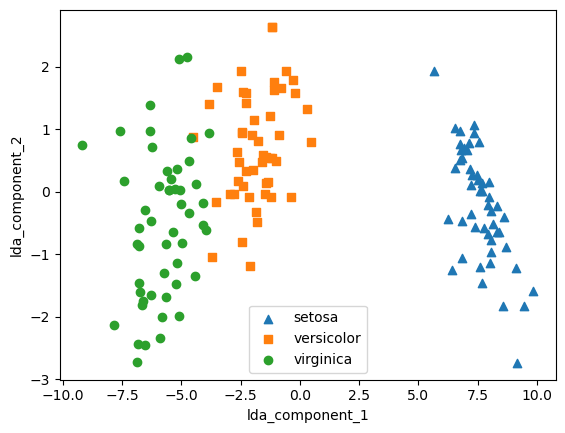

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = iridDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

### 원본데이터 & PCA & LDA 예측 성능 비교

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [21]:
lda_X = irisDF_lda[['lda_component_1', 'lda_component_2']]
scores_lda = cross_val_score(rcf, lda_X, iris.target, scoring='accuracy', cv=3 )
print('LDA 변환 데이터 교차 검증 개별 정확도:',scores_lda)
print('LDA 변환 데이터 평균 정확도:', round(np.mean(scores_lda), 4))

LDA 변환 데이터 교차 검증 개별 정확도: [1.   0.9  0.94]
LDA 변환 데이터 평균 정확도: 0.9467


In [23]:
lda.explained_variance_ratio_

# 여기서 explained_variance_ratio_ 는 pca에서와의 의미와 조금 다르다 (리서치 필요)

array([0.9912126, 0.0087874])